In [1]:
import sklearn
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

# 비지도 학습의 종류
 ## 비지도 변환
- 비지도 변환은 데이터를 새롭게 표현하여 머신러닝 알고리즘이 원래 데이터보다 쉽게 해석할 수 있게 만드는 알고리즘
- 고차원 데이터를 특성의 수를 줄이면서 꼭 필요한 특징을 포함한 데이터로 표현하는 방법이 차원 축소가 그에 해당한다. 
- 시각화를 위해 데이터셋을 2차원으로 변경하는 경우가 그 예이다.
- 텍스트 문서에서 주제를 추출하는 등 데이터를 구성하는 단위나 성분을 찾기도 한다. 



## 군집 알고리즘

- 데이터를 비슷한 것끼리 그룹으로 묶는 것
- 사진에 나타난 모든 얼굴을 추출해서 비슷한 얼굴로 군집화하는 것


- 비지도 학습은 알고리즘이 유용한 뭔가를 학습했는지 평가하는 것이 어렵다. 비지도 학습의 결과를 평가하는 것은 직접 확인하는 것이 유일한 방법일 때가 많다. 
- 탐색적 분석단계(EDA)단계에서 많이 사용된다. 지도학습의 전처리 단계에는 비지도 변환이 수반된다. 

# 데이터 전처리와 스케일 조정
- SVM이나 신경망같은 알고리즘은 데이터의 스케일에 민감하다. 

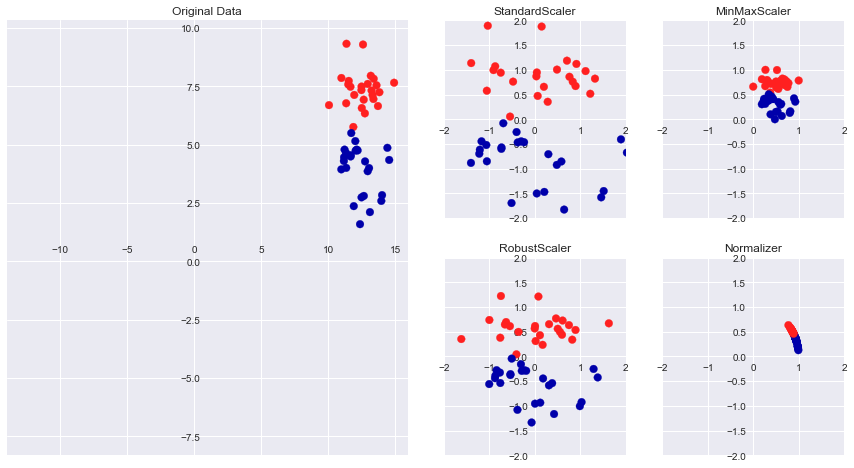

In [2]:
mglearn.plots.plot_scaling()

## 여러가지 전처리 방법
- StandardScaler : 각 특성의 평균을 0, 분산을 1로 변경한다. 특성의 최솟값 최대값을 제한하지 않는다
- RobustScaler : 특성들이 같은 스케일을 갖게 된다는 통계적 측면은 있지만, 중간 값과 사분위 값을 사용하여, 이상치에 견고한 데이터를 만든다.
- MinMaxScaler : 모든 특성이 정확하게 0과 1사이에 위치하도록 스케일링한다. 
- Normalizer : 특성 벡터의 유클리디안 길이가 1이 되도록 데이터 포인트를 조정한다. 지름이 1인 원에 데이터 포인트를 투영하여, 이러한 정규화는 특성 벡터의 길이는 상관없고 데이터의 방향(또는 각도)만이 중요할 때 사용한다. 

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [4]:
from sklearn.preprocessing import MinMaxScaler
# fit 메서드로 X_train에 대해서 학습시킨다.
scaler = MinMaxScaler().fit(X_train)

X_train_scaled= scaler.transform(X_train)
print('스케일 조정 전 특성별 최솟값: \n{}'.format(X_train.min(axis=0)))
print('스케일 조정 전 특성별 최댓값: \n{}'.format(X_train.max(axis=0)))
print('스케일 조정 후 특성별 최솟값: \n{}'.format(X_train_scaled.min(axis=0)))
print('스케일 조정 후 특성별 최댓값: \n{}'.format(X_train_scaled.max(axis=0)))

스케일 조정 전 특성별 최솟값: 
[  6.98100000e+00   9.71000000e+00   4.37900000e+01   1.43500000e+02
   5.26300000e-02   1.93800000e-02   0.00000000e+00   0.00000000e+00
   1.06000000e-01   4.99600000e-02   1.11500000e-01   3.62800000e-01
   7.57000000e-01   7.22800000e+00   1.71300000e-03   2.25200000e-03
   0.00000000e+00   0.00000000e+00   7.88200000e-03   8.94800000e-04
   7.93000000e+00   1.20200000e+01   5.04100000e+01   1.85200000e+02
   7.11700000e-02   2.72900000e-02   0.00000000e+00   0.00000000e+00
   1.56500000e-01   5.50400000e-02]
스케일 조정 전 특성별 최댓값: 
[  2.81100000e+01   3.38100000e+01   1.88500000e+02   2.50100000e+03
   1.44700000e-01   3.11400000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.74400000e-02   2.87300000e+00   4.88500000e+00
   2.19800000e+01   5.42200000e+02   2.33300000e-02   1.06400000e-01
   3.96000000e-01   5.27900000e-02   6.14600000e-02   2.98400000e-02
   3.60400000e+01   4.95400000e+01   2.51200000e+02   4.25400000e+03
   2.22600000e-01   1.0580000

#### 테스트 데이터 역시 훈련 데이터와 같은 변수로 조정해야 한다. 
- 그렇지 않으면 아래와 같이 최솟값 최대값이 중구난방이 된다. 

In [5]:
X_test_scaled = scaler.transform(X_test)

print('스케일 조정 후 특성별 최솟값: \n{}'.format(X_test_scaled.min(axis=0)))
print('스케일 조정 후 특성별 최댓값: \n{}'.format(X_test_scaled.max(axis=0)))

스케일 조정 후 특성별 최솟값: 
[ 0.03540158  0.04190871  0.02895446  0.01497349  0.14260888  0.04999658
  0.          0.          0.07222222  0.00589722  0.00105015 -0.00057494
  0.00067851 -0.0007963   0.05148726  0.01434497  0.          0.
  0.04195752  0.01113138  0.03678406  0.01252665  0.03366702  0.01400904
  0.08531995  0.01833687  0.          0.          0.00749064  0.02367834]
스케일 조정 후 특성별 최댓값: 
[ 0.76809125  1.22697095  0.75813696  0.64750795  1.20310633  1.11643038
  0.99906279  0.90606362  0.93232323  0.94903117  0.45573058  0.72623944
  0.48593507  0.31641282  1.36082713  1.2784499   0.36313131  0.77476795
  1.32643996  0.72672498  0.82106012  0.87553305  0.77887345  0.67803775
  0.78603975  0.87843331  0.93450479  1.0024113   0.76384782  0.58743277]


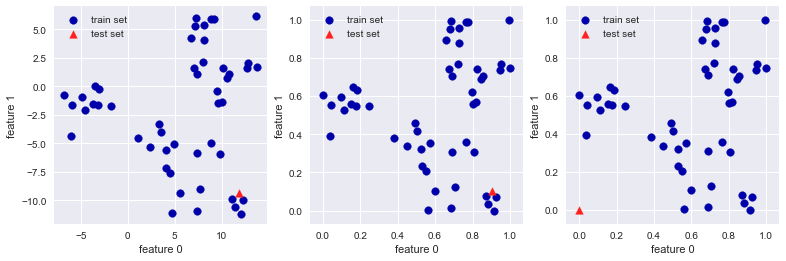

In [6]:
from sklearn.datasets import make_blobs
# 인위적인 데이터 생성
X, _ = make_blobs(n_samples=50, centers= 5, random_state =4, cluster_std = 2)
X_train, X_test = train_test_split(X, random_state=5, test_size =1)

fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=mglearn.cm2(0), label='train set', s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker = '^', c=mglearn.cm2(1), label='test set', s=60)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2(0), label='train set', s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker = '^', c=mglearn.cm2(1), label='test set', s=60)

# 잘못된 방식
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2(0), label='train set', s=60)
axes[2].scatter(X_test_scaled_badly [:, 0], X_test_scaled_badly [:, 1], marker = '^', c=mglearn.cm2(1), label='test set', s=60)

for ax in axes:
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
    ax.legend(loc = 'best')

## 지도학습에서 데이터 전처리 효과

In [7]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print('테스트 세트 정확도 : {:.4f}'.format(svm.score(X_test, y_test)))

테스트 세트 정확도 : 0.6294


In [8]:
#0 ~1 t사이로 스케일 조정
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

print('조정된 테스트 세트 정확도 : {:.4f}'.format(svm.score(X_test_scaled, y_test)))

조정된 테스트 세트 정확도 : 0.9650


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

print('조정된 테스트 세트 정확도 : {:.4f}'.format(svm.score(X_test_scaled, y_test)))

조정된 테스트 세트 정확도 : 0.9580


# 차원 축소, 특성 추출, 매니폴드 학습
## 주성분 분석(PCA)
- 특성들이 상관관계가 없도록 데이터셋을 회전시키는 기법
- 회전한 뒤 데이터를 설명하는데 얼마나 중요하냐에 따라 종종 새로운 특성 중 일부만 선택된다. 

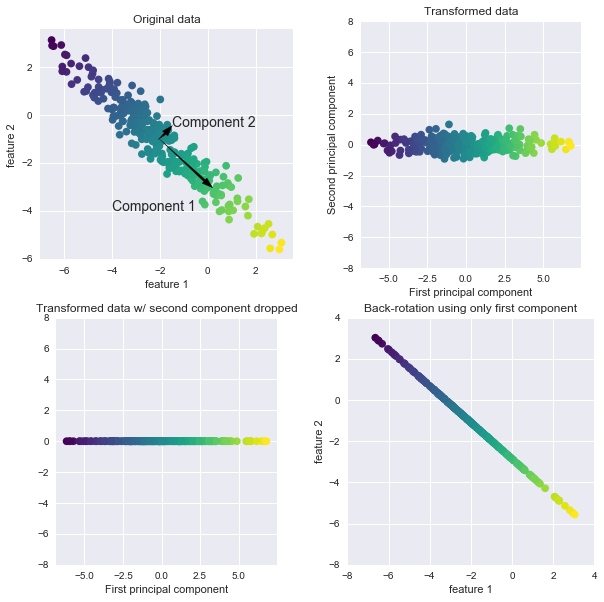

In [10]:
# 인위적으로 만든 2차원 데이터셋을 통해 PCA효과를 나타낸것
mglearn.plots.plot_pca_illustration()

- 위쪽에서 먼저 Component 1이 가장 많은 정보를 담고 있는 방향이다.(특성들의 상관관계가 가장 큰 방향)
 - 1) 먼저 Component 1이라고 쓰여 있는 분산이 가장 큰 방향을 찾는다
 - 2) 첫 번째 방향과 직각인 방향 중에 가장 많은 정보를 담은 방향을 찾는다.( 2차원에서는 하나지만, 고차원에서는 많은 직각방향 존재
 - 3) 각 성분의 방향은 중요하지 않다. 
- 이런 과정으로 찾은 방향을 주성분(Principal Component)라고 한다. 
- 오른쪽 위 그래프는 주성분 1과 2를 각각 x축과 y축에 나란하도록 회전한 것이다. 
 - 회전된 두 축은 연관되어 있지 않으므로 상관 관계 행렬이 대각선 방향을 제외하고는 0이 된다. 
- PCA는 주성분의 일부만 남기는 차원 축소 용도로 사용할 수 있다. 
 - 왼쪽 아래 그래프처럼 첫 번쨰 주성분만 남긴다면, 2차원 데이터셋이 1차원 데이터셋으로 차원이 감소된 것이다. 
 - 원본 특성이 아니라 앞에서 찾았던 주성분 중 유용한 것을 유지시키는 것이다. 
- 마지막으로 다시 데이터에 평균을 더해 회전복원 시킨다. 
 - 이 데이터 포인트들은 원래 특성 공간에놓여 있지만, 첫 번째 주성분의 정보만 담고 있다.
 - 이 변환은 데이터에서 노이즈를 제거하거나 주성분에서 유지되는 저옵를 시각하는데 사용한다. 

## 고차원 데이터의 시각화 by Histogram
- 아래는 각 특성에 대한 히스토그램으로 특정간격(bin)에 얼마나 많은 데이터 포인트가 나타나는지 횟수를 센것이다.
- 푸른색은 양성, 붉은색은 악성 클래스의 포인트를 나타난다. 
- smoothness error특성은 두 히스토그램이 겹쳐져 쓸모 없다. 
- 'worst concave points'는 두 히스토그램이 구분되어 있어 매우 유용한 특성이다.
- 그러나 특성간의 상호작용과 상호작용이 클래스와 어떤 관련이 있는지는 알 수없다.
- PCA를 이용하면 주요 상호작용을 찾아 낼수 있다. 

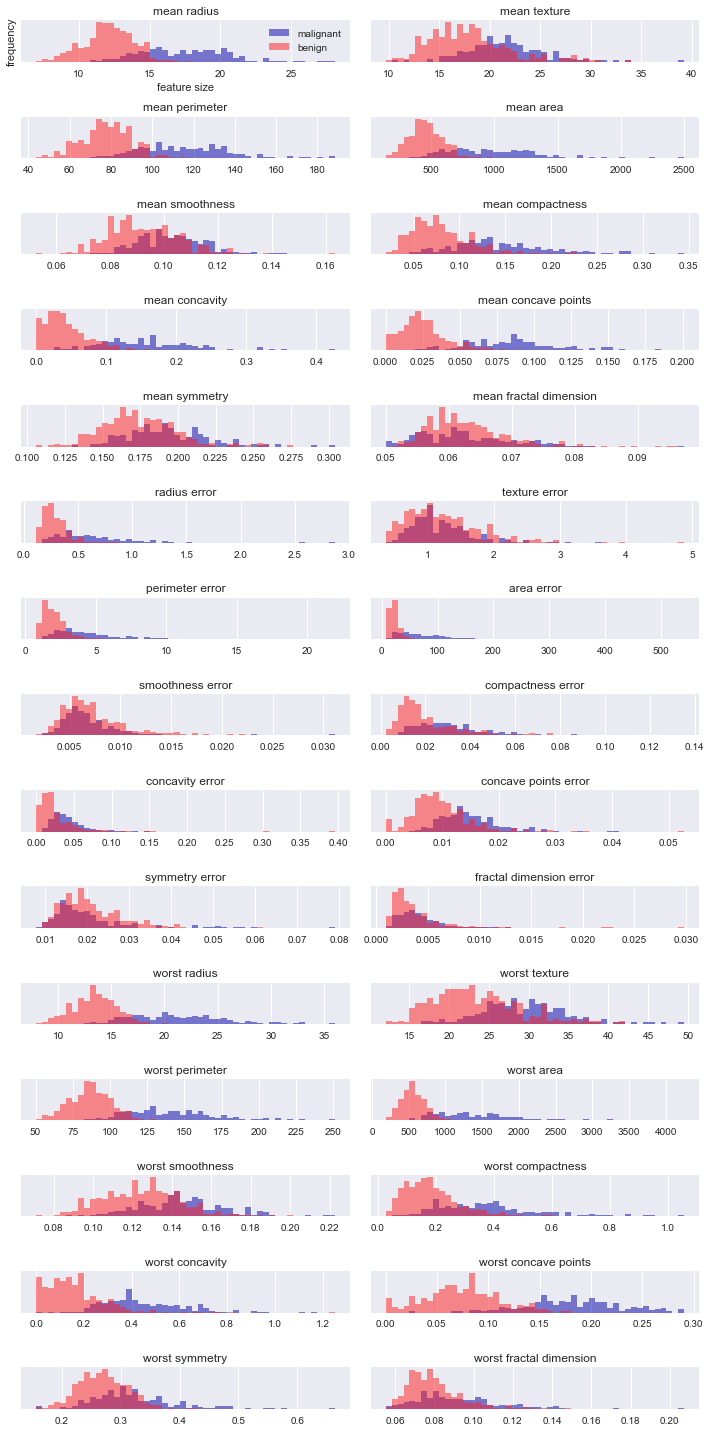

In [11]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target ==0 ]
benign = cancer.data[cancer.target == 1]

ax =axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins = bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins= bins, color=mglearn.cm3(1), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel('feature size')
ax[0].set_ylabel('frequency')
ax[0].legend(['malignant', 'benign'], loc='best')
fig.tight_layout()


## 고차원 데이터의 시각화 by PCA
- PCA 객체를 생성하고, fit메서드로 주성분을 찾고, transform메서드로 데이터를 회전시키고 차원을 축소한다.
- 매개변수를 기본값으로 할때는 모든 주성분을 유지하여, 회전만 시키고, 차원축소는 행하지 않는다.
- n_components 매개변수로 유지할 성분의 수를 설정한다. 
- 특성의 스케일이 서로 다르면 올바른 주성분 방향을 찾을수 없으므로 스케일링이 필요하다.
- PCA는 특이값 분해(SVD) 방식을 통해 주성분을 찾는다. fit 메서드에서 Scipy의 linalg.svd 함수를 통해 U, s, V배열을 구하고, transform 메서드에서 입력데이터와 주성분 V행렬의 전치행렬을 곱하여 변환된 데이터를 구한다. 이 값은 U와 s를 곱해서도 구할 수 이싿. fit_transform 메서드에서는 U와 s를 사용해 변환된 데이터를 계산하여 차원이 많은 데이터에서 몇 개의 주성분만 고를 경우 성능이 조금 더 좋다.

In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
cancer = load_breast_cancer()
# PCA 적용 전 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cancer.data)

# 데이터의 처음 두 개의 주성분만 유지
pca = PCA(n_components=2)
#유방암데이터로 PCA 모델 구축
pca.fit(X_scaled)

# 처음 두 개의 주성분을 사용해 데이터 변환
X_pca = pca.transform(X_scaled)
print('원본 데이터 형태 : {}'.format(str(X_scaled.shape)))
print('축소된 데이터 형태 : {}'.format(str(X_pca.shape)))

원본 데이터 형태 : (569, 30)
축소된 데이터 형태 : (569, 2)


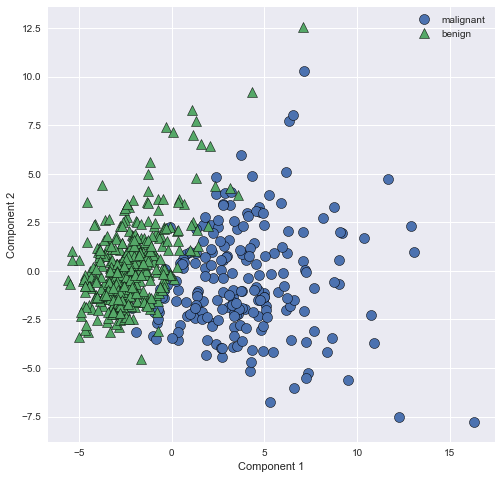

In [13]:
# 클래스를 새깔로 구분하여 처음 두 개의 주성분을 시각화
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target, markeredgewidth=0.5)
plt.legend(['malignant', 'benign'], loc='best')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

- PCA 는 비지도 학습이므로 회전축을 찾을 떄 어떤 클래스 정보도 사용하지 않고, 데이터에 있는 상관관계만을 고려한다.
- 두 클래스가 잘 구분되는것을 볼 수 있으나, 두 축을 해석하기 쉽지 않다.
- 주 성분은 원본 데이터에서 여러 특성이 조합된 형태로, coponents_속성에 주성분이 저장된다.
- coponent_의 각 열은 원본의 특성에 대응하는 값이다. 보통 많은 특성이 섞여 있기 때문에 위 그림의 축이 가지는 의미를 설명하기 어렵다.

In [14]:
print('pca 주성분 형태 :', pca.components_.shape)
print('pca 주성분\n', pca.components_)

pca 주성분 형태 : (2, 30)
pca 주성분
 [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


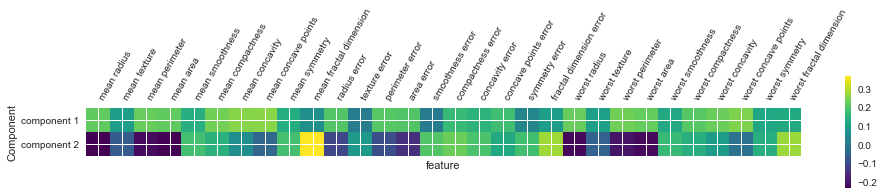

In [15]:
#sns.heatmap(pca.components_, cmap= 'viridis')
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ['component 1', 'component 2'])
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.colorbar()
plt.xlabel('feature')
plt.ylabel('Component')

## 고유얼굴(eigenface) 특성 추출
- PCA는 특성추출에도 사용된다. 특성 추출은 원본 데이터 표현보다 분석하기에 더 적합한 표현을 찾고자 하는 것이다.
- 이미지를 다루는 애플리케이션은 특성 추출이 도움이 되는 대표적 사례이다. 
- 이미지는 적,녹,청(RGB)의 강도가 기록된 픽셀로 기록되어 보통 이미지는 수천개의 픽셀로 이루어진다.
- PCA를 이용하여 LFW 데이터셋에서 얼굴이미지의 특성을 추출해본다.

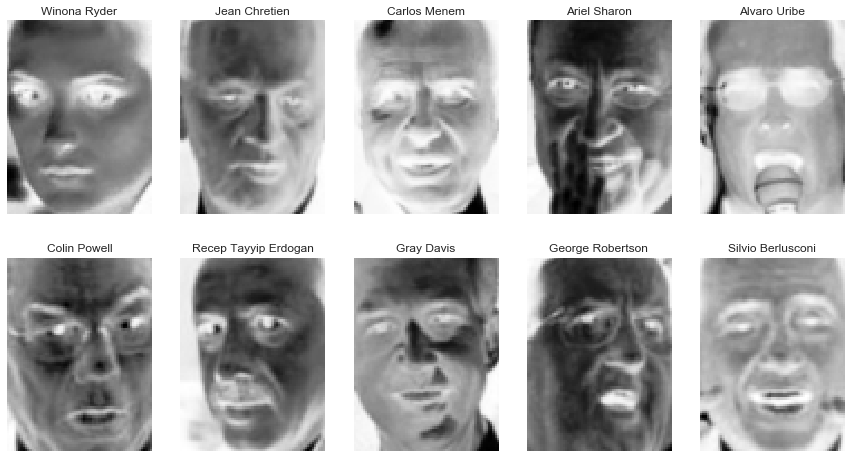

In [48]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize = 0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw= {'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

- 62명을 찍은 3023장의 이미지, 각 이미지는 87 * 65픽셀

In [24]:
print('people.images.shape : ', people.images.shape)
print('n of Classes :', len(people.target_names))

people.images.shape :  (3023, 87, 65)
n of Classes : 62


In [26]:
# 각 타깃이 나타난 횟수
counts = np.bincount(people.target)
# 타깃별 이름과 횟수 출력
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end = '\t')
    if (i + 1) %3 == 0:
        print()

Alejandro Toledo           39	Alvaro Uribe               35	Amelie Mauresmo            21	
Andre Agassi               36	Angelina Jolie             20	Ariel Sharon               77	
Arnold Schwarzenegger      42	Atal Bihari Vajpayee       24	Bill Clinton               29	
Carlos Menem               21	Colin Powell              236	David Beckham              31	
Donald Rumsfeld           121	George Robertson           22	George W Bush             530	
Gerhard Schroeder         109	Gloria Macapagal Arroyo    44	Gray Davis                 26	
Guillermo Coria            30	Hamid Karzai               22	Hans Blix                  39	
Hugo Chavez                71	Igor Ivanov                20	Jack Straw                 28	
Jacques Chirac             52	Jean Chretien              55	Jennifer Aniston           21	
Jennifer Capriati          42	Jennifer Lopez             21	Jeremy Greenstock          24	
Jiang Zemin                20	John Ashcroft              53	John Negroponte            31	

- 조지 부쉬와 colin powell의 이미지가 너무 많으므로 (각각 236, 530개) 사람마다 50개의 이미지만 선택

In [34]:
mask = np.zeros(people.target.shape, dtype = np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]

# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 스케일 값으로 조정(just like MinmaxSclaer)
X_people = X_people/255

- 보통 얼굴 데이터베이스에는 사람의 수는 많지만 각 사람에 대한 이미지는 적기 때문에, 대부분의 분류기를 훈련시키기 어렵다.
- 대규모 모델을 다시 훈련시키지 않고도 새로운 사람의 얼굴을 쉽게 추가할 수 있어야 한다. 

In [41]:
# 최근접 이웃 분류기 사용 시도
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, random_state = 0)

knn = KNeighborsClassifier(n_neighbors = 1).fit(X_train, y_train)

print('1- 최근접 이웃의 훈련 세트 점수 : {:.4f}'.format(knn.score(X_train, y_train)))
print('1- 최근접 이웃의 테스트 세트 점수 : {:.4f}'.format(knn.score(X_test, y_test)))

1- 최근접 이웃의 훈련 세트 점수 : 1.0000
1- 최근접 이웃의 테스트 세트 점수 : 0.2829


- PCA whitening(백색화)는 변환된 데이터의 표준편차를 앞서 고유분해 linalg.svd에서 배열 s를 샘플 갯수의 제곱근으로 나누어 구한다. whitening은 PCA변환을 할 때 이 표준편차를 나누어 적용함으로써 데이터의 평균을 0으로 만들어 주므로 자동으로 StandardScaler를 적용하는 것과도 같다.
- 아래는 whitening 옵션으로 데이터가 회전한 것 뿐만아니라 스케일도 조정되어 그래프가 타원이 아닌 원 모양으로 바뀌는 것을 볼 수 있다. 

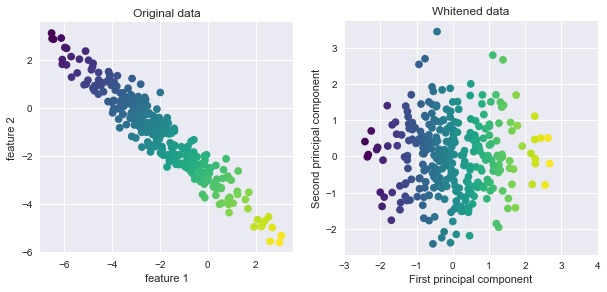

In [42]:
mglearn.plots.plot_pca_whitening()

In [43]:
pca = PCA(n_components=100, whiten = True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print('X_train_pca.shape : {}'.format(X_train_pca.shape))

X_train_pca.shape : (1547, 100)


In [44]:
# 최근접 이웃 분류기 사용 시도
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1).fit(X_train_pca, y_train)

print('1- 최근접 이웃의 훈련 세트 점수 : {:.4f}'.format(knn.score(X_train_pca, y_train)))
print('1- 최근접 이웃의 테스트 세트 점수 : {:.4f}'.format(knn.score(X_test_pca, y_test)))

1- 최근접 이웃의 훈련 세트 점수 : 1.0000
1- 최근접 이웃의 테스트 세트 점수 : 0.3275


In [46]:
print('pca_components_.shape :', pca.components_.shape)

pca_components_.shape : (100, 5655)


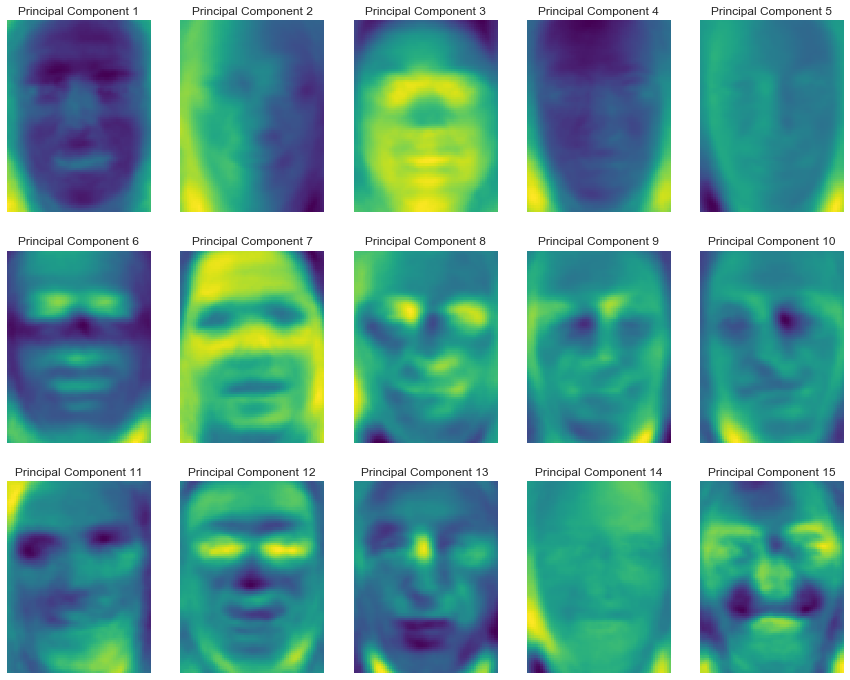

In [61]:
fig, axes = plt.subplots(3, 5, figsize = (15, 12), subplot_kw= {'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap = 'viridis')
    
    ax.set_title('Principal Component {}'.format(i+1))



In [72]:
X_people[0].reshape(1, -1).shape, pca.components_.shape

((1, 5655), (100, 5655))

- 테스트 포인트를 주성분의 가중치 합으로 나타내는데 필요한 수치(PCA 변환뒤의 새로운 특성값)을 찾는 것이다. 
- 샘플데이터(1 X 5655)에 주성분의 전치행렬(5655 x 100)을 곱하면 100개의 새로운 특성 값을 도출할 수 있다. 이 새로운 특성 값(1 X 100)에 주성분 (100 x 5655)를 곱하면 원본 샘플(1 X 5655)를 얻을 수 있어 PCA로 구한 특성과 주성분의 가중치 합으로 원본 샘플을 표현한다고 할 수있다. 
- 주성분을 10개만 사용했을 때는 얼굴의 각도, 조명같은 이미지의 기본요소만 나타나는 반면, 많은 성분을 사용할 수록 이미지가 상세해진다. 
- cancer 데이터셋 처럼 PCA의 첫 두 주성분을 통해 전체데이터를 누구의 얼굴인지 클래스로 구분해 산점도에 나타낼수도 있다. 

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[ 0.780392, ...,  0.091503],
       ..., 
       [ 0.227451, ...,  0.930719]], dtype=float32), 
array([[ 0.069281, ...,  0.428758],
       ..., 
       [ 0.159477, ...,  0.573856]], dtype=float32))
________________________________________________________pca_faces - 9.0s, 0.2min


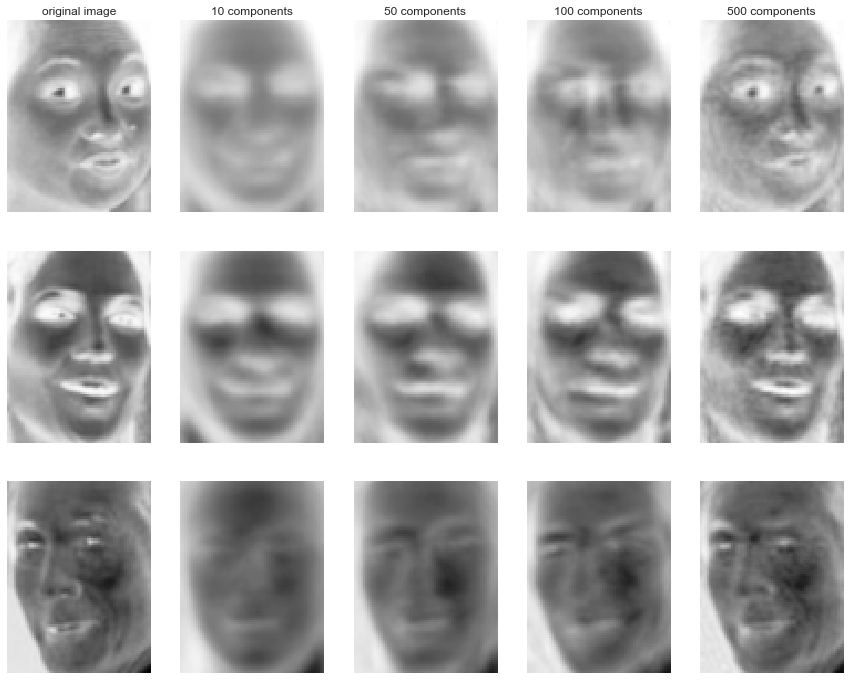

In [73]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

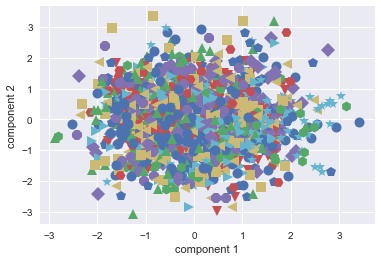

In [74]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel('component 1')
plt.ylabel('component 2')

# 비음수 행렬 분해(MNF)
- Non-negative_matrix_factorization은 유용한 특성을 뽑아내기 위한 비지도 학습알고리즘
- PCA와 유사하고 차원축소에도 사용 가능
- NMF는 음수가 아닌 성분과 계수 값을 찾는다. 따라서 음수가 아닌 주성분과 계수의 가중치 합을 구한다. 
- 음수 아닌 가중치 합으로 데이터를 분해하는 기능은 여러 사람의 목소리가 담긴 오디오 트랙이나 여러 악기로 이뤄진 음악 처럼 독립된 소스를 추가하여 만들어진 데이터에 유용하다. 
- NMF는 섞여 있는 데이터에서 원본 성분을 구분할  수 있다. 

## 인위적 데이터에 NMF 적용
- 성분을 사용할 수록 많은 방향을 가지게 된다. 
- 특성 개수만큼 많다면 알고리즘은 데이터의 각 특성의 끝에 위치한 포인트를 가리킨다. 
- NMF는 특정 방식으로 정렬 되어있지 않아서 첫 번째 주성분 같은 것이 없고, 모든 성분이 동등핟. 
- 무작위로 초기화하기 때문에 random_state 에 따라 값이 달라진다. 

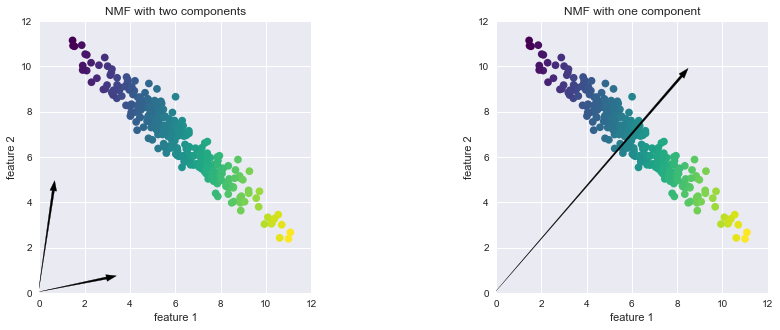

In [75]:
mglearn.plots.plot_nmf_illustration()

## 얼굴데이터에 NMF 적용
- 반환을 되돌린 결과는 PCA를 사용햇을 때와 같이 성분수가 올라갈수록 원본에 가까워지짐나, 품질이 조금 떨어진다. 
- NMF는 데이터를 인코딩하거나 재구성하는 용도보다는 데이터의 유용한 패턴을 찾는데 활용한다. 

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[ 0.780392, ...,  0.091503],
       ..., 
       [ 0.227451, ...,  0.930719]], dtype=float32), 
array([[ 0.069281, ...,  0.428758],
       ..., 
       [ 0.159477, ...,  0.573856]], dtype=float32))
______________________________________________________nmf_faces - 570.9s, 9.5min


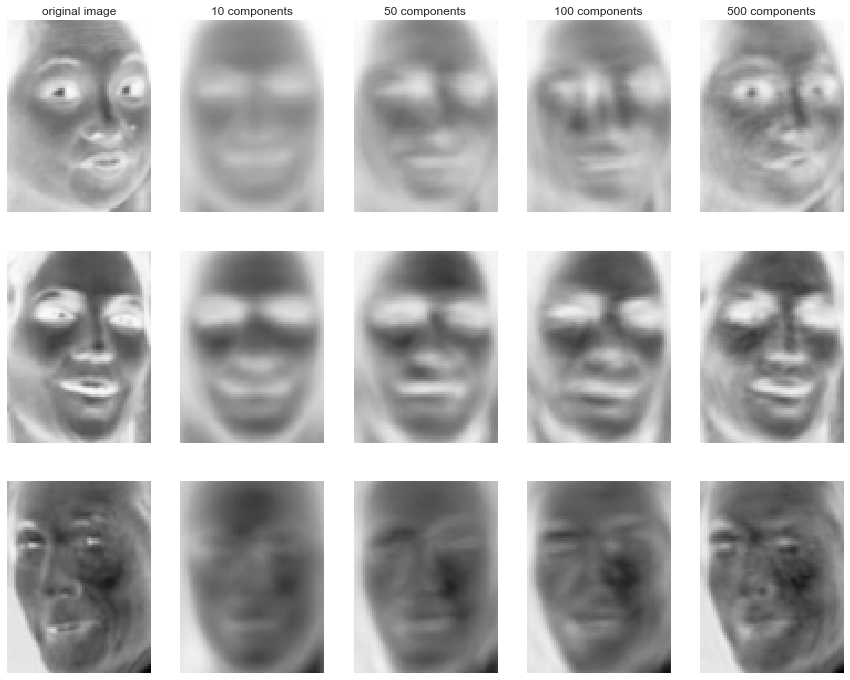

In [77]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

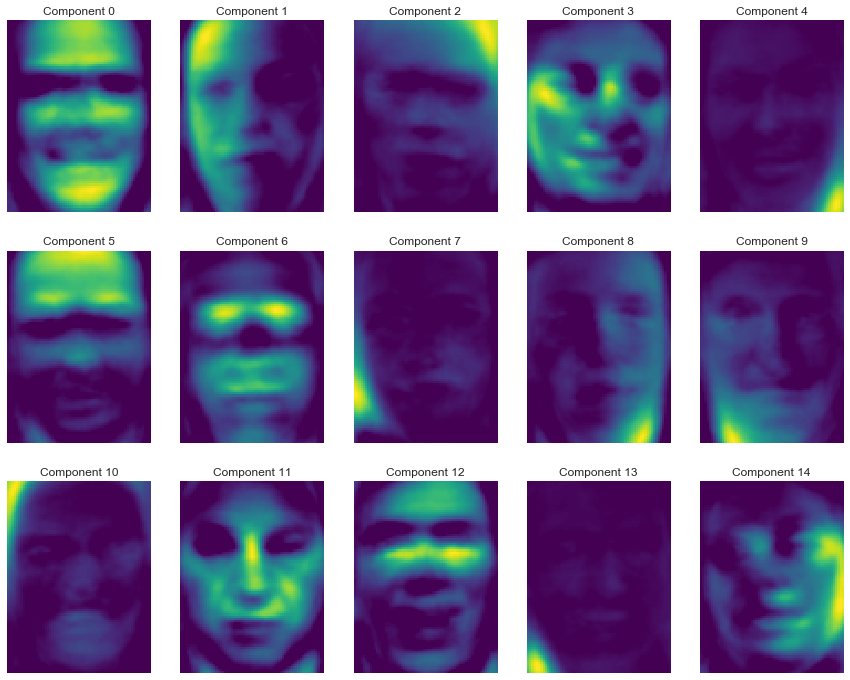

In [81]:
from sklearn.decomposition import NMF
nmf = NMF(n_components = 15, random_state =0).fit(X_train)

X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_train)

fig, axes = plt.subplots(3, 5, figsize= (15, 12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap = 'viridis')
    ax.set_title('Component {}'.format(i))

- 모두 양수 값을 가지기 때문에 얼굴 원형이 더 잘 보인다. 
- 성분 3은 오른쪽으로 조금 돌아간 얼굴로 보이고, 성분 7은 조금 회전한 얼굴로 보인다. 
- np.argsort(X_train_nmf[:, compn])명령어를 통해 그 성분이 가장 큰 순서대로 정렬한 index들 리스트를 얻을 수있다.argsort는 항상 오름차순이므로 [::-1]로 역순으로 바꾸어준다.
- 예상대로 성분 3에 대한 계수 값이 큰 얼굴들은 왼쪽으로 돌아가 있고,
- 성분 7에 대한 계수값이 큰 얼굴들은 오른쪽으로 돌아가 있다. 
- 이와 같은 패턴을 추출하는 것은 소리, 유전자 표현, 텍스트 데이터처럼 덧붙이는 구조를 가진 데이터에 적합하다. 

성분 3


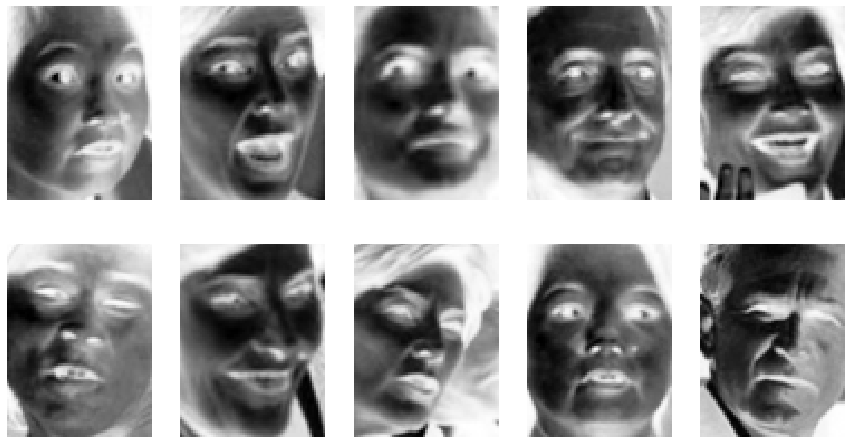



성분 7


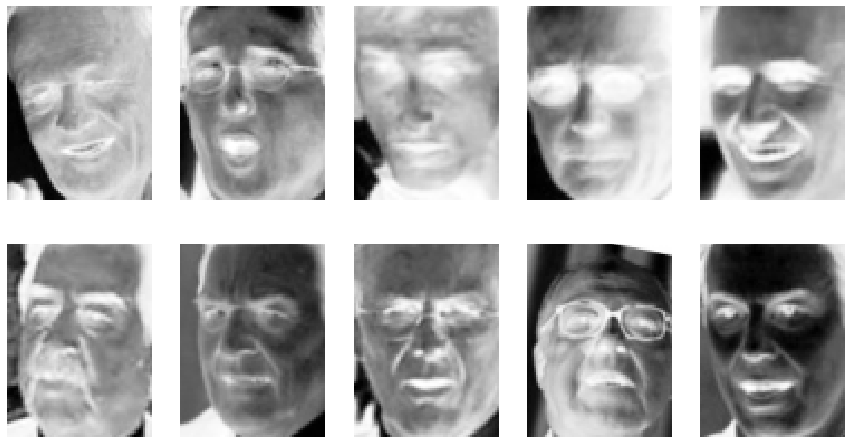

In [93]:
print('성분 3')
compn = 3
# 4번째 성분으로 정렬하여 처음 10개 이미지 출력
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize = (15, 8), subplot_kw = {'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
plt.show()
print('\n\n성분 7')
compn = 7
# 4번째 성분으로 정렬하여 처음 10개 이미지 출력
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize = (15, 8), subplot_kw = {'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))


- 인위적으로 섞인 3개의 신호를 관찰
- 합쳐진 신호를 분해해서 원본 신호를 복원 시도

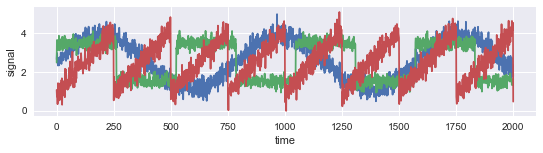

In [97]:
S = mglearn.datasets.make_signals()

plt.figure(figsize = (9, 2))
plt.plot(S, '-')
plt.xlabel('time')
plt.ylabel('signal')

In [104]:
#원본 데이터를 이용해 100개의 측정 데이터 만듬 (100개의 측정 장치로 관찰한 데이터라고 가정)
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print('측정 데이터 형태 : {}'.format(X.shape))


측정 데이터 형태 : (2000, 100)


In [103]:
# nmf 시도
nmf = NMF(n_components=3, random_state = 42)
S_ = nmf.fit_transform(X)

print("NMF로 복원된 신호 데이터 형태 :", S_.shape)
# pca 시도
pca = PCA(n_components=3)
H = pca.fit_transform(X)
print("pca로 복원된 신호 데이터 형태 :", H.shape)

NMF로 복원된 신호 데이터 형태 : (2000, 3)
pca로 복원된 신호 데이터 형태 : (2000, 3)


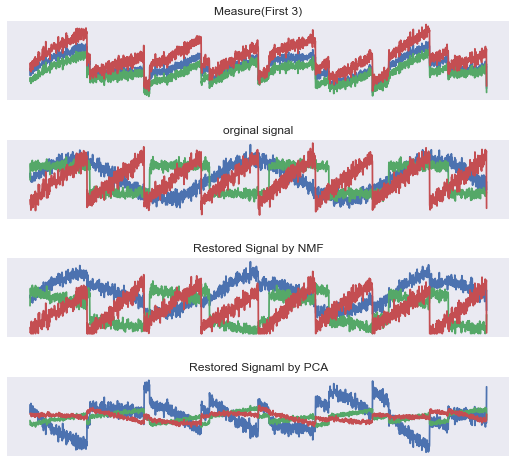

In [106]:
models = [X, S, S_, H]
names = ['Measure(First 3)', 'orginal signal', 'Restored Signal by NMF', 'Restored Signaml by PCA']

fig, axes = plt.subplots(4, figsize = (9, 8), gridspec_kw = {'hspace': .5}, subplot_kw={'xticks': (), 'yticks': ()})
for model, name, ax in zip(models, names, axes):
    ax.plot(model[:, :3], '-')
    ax.set_title(name)

- NMF는 원본 신호를 잘 복원했지만, PCA 는 실패하였고, 대부분의 변동을 첫 번째 성분을 통해 나타내었다. 
- NMF로 생성한 성분은 순서가 없으므로 같은 색깔로 보이는 것은 우연이다. 실제로는 성분간의 상하는 존재하지 않는다. 

## t-SNE를 이용한 매니폴드 학습
- PCA를 통해 데이터를 산점도로 시각화할 수 있지만, 해석이 매우 어렵고, 유용성이 떨어진다. 
- 매니폴드 학습(Manifold Learning) 알고리즘은 훨씬 복잡한 매핑을 만들어 더 나은 시각화를 제공하는 시각화 알고리즘이다. 
- t-SNE(t-Distributed Neighbor Embedding)
- 테스트 세트에는 적용이 불가능하고, EDA에 유용하다. 
- t-SNE은 데이터 포인트 사이의 거리를 가장 잘 보존하는 2차원 표현을 찾는 것이다. 
- 먼저 데이터 포인트를 2차원에 무작위로 표현한 뒤 원본 특성 공간에서 가까운 포인트는 가깝게, 멀리 떨어진 포인트는 멀어지게 만든다. 
- 멀리 떨어진 포인트와 거리를 보존하는 것보다, 가까이 있는 포인트를 더 중시하여, 이웃 데이터에 대한 정보를 보존하려 한다. 
- sikit-learn에서는 쿨백-라이블러 발산(Kullback-Leibler Divergence) 목적 함수를 최적화하기 위해 모멘텀을 적용한 배치 경사 하강법을 사용한다. TSNE의 method 기본 값은 'barnes_hut'으로 그래디언트 계산의 복잡도를 O(N^2)에서 O(NlogN)으로 낮춰주는 방법이고 'exact'옵션을 통해 정확한 계산이 가능하나 느려진다. 

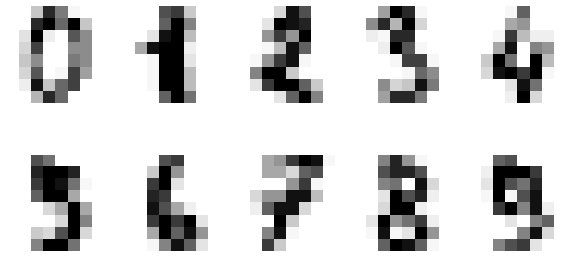

In [113]:
from sklearn.datasets import load_digits

digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize = (10, 5), subplot_kw={'xticks': (), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

- 먼저 PCA를 통해 시각화 시도

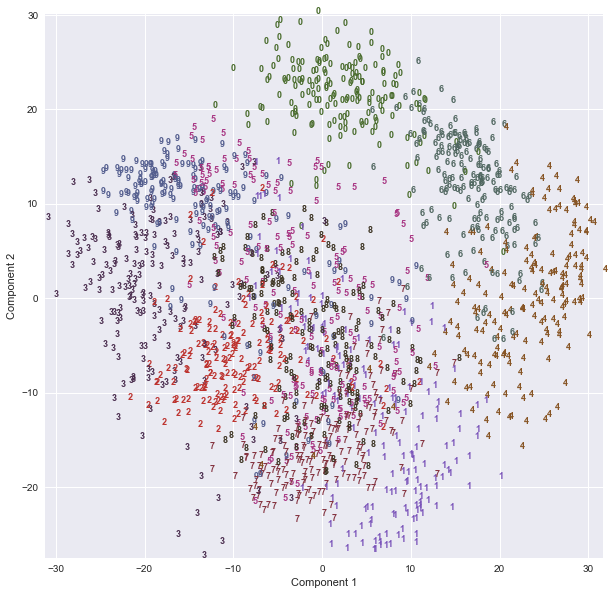

In [119]:
pca = PCA(n_components = 2)
pca.fit(digits.data)

digits_pca = pca.transform(digits.data)
colors = ['#476A2A', '#7851B8', '#BD3430', '#4A2D4E', '#875525', '#A83683', '#4E655E', '#853541','#3A3120', '#535D8E']
plt.figure(figsize = (10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    #숫자 텍스트를 이용해 산점도를 그린다.
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]), color = colors[digits.target[i]], 
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel('Component 1')
plt.ylabel('Component 2')
    

- t-SNE을 이용한 시각화

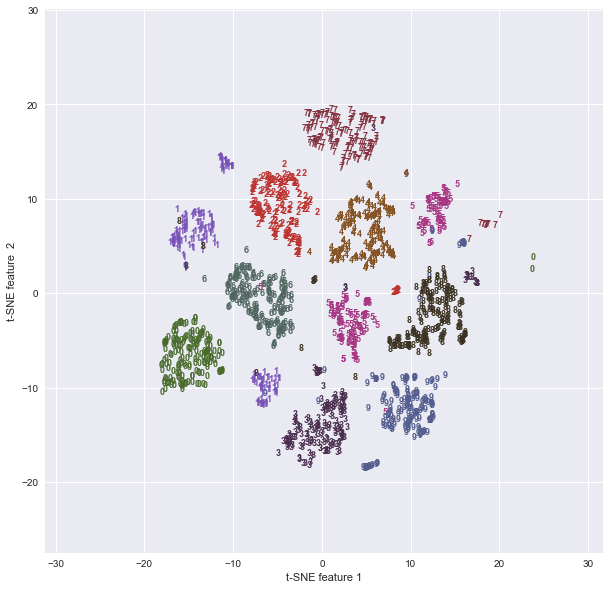

In [127]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state = 10)
# TSNE에서는 transform 메서드가 없으므로 대신 fit_transform이용
data_tsne = tsne.fit_transform(digits.data)
colors = ['#476A2A', '#7851B8', '#BD3430', '#4A2D4E', '#875525', '#A83683', '#4E655E', '#853541','#3A3120', '#535D8E']
plt.figure(figsize = (10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # text 는 하나씩 하나씩 찍는것으므로 스칼라 값을 넣어야한다. 
    plt.text(data_tsne[i, 0], data_tsne[i, 1], str(digits.target[i]), color=colors[digits.target[i]],
                fontdict={'weight': 'bold', 'size': 9})
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature  2')

- t-SNE에 의한 시각화는 매우 우수한것을 볼수 있다. 
- 기본값으로도 잘 작동하지만 매개변수 조정도 필요할 때가 있다. 
- perplexity값이 크면 더 많은 이웃을 포함하며 작은 그룹은 무시한다. 데이터셋이 클 경우 perplexity도 커져야한다. 기본값은 30이고 5~50사이의 값을 지정하는 것이 보통이다
- TSNE 모델은 초기 과장(Early Exaggeration) 단계와 최적화 단계를 가지는데 early_exaggeration 매개변수는 초기 과장 단계에서 원본 공간의 클러스터들이 얼마나 멀게 2차원에 나타낼지를 정한다. 기본값은 4이며 최소한 1보다 커야하고 값이 클수록 간격이 커진다. 